In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

In [2]:
(Xtr,ytr),(Xte,yte)=tf.keras.datasets.mnist.load_data()

In [3]:
Xtr=Xtr/255
Xte=Xte/255
Xval,Xtr=Xtr[:5000],Xtr[5000:]
yval,ytr=ytr[:5000],ytr[5000:]

<Axes: >

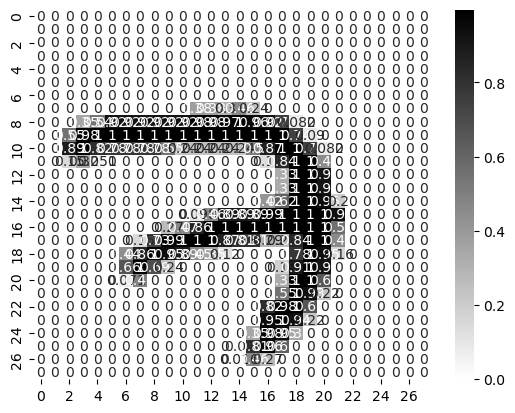

In [5]:
sns.heatmap(Xtr[0],cmap='binary',annot=True)

In [9]:
from tensorflow.keras.layers import Flatten as flat, Dense as dense
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout as drop
from tensorflow.keras.layers import BatchNormalization as bnorm
lyrs=[
    flat(input_shape=[28,28],name='inputlayer'),
    dense(300,activation='relu',name='hl1',kernel_regularizer=regularizers.L2(1e-4)),
    bnorm(),
    dense(100,activation='relu',name='hl2'),
    drop(0.2),
    dense(10,activation='softmax',name='outputlayer')    
]
model_clf=seq(lyrs)

In [12]:
model=seq()
model.add(flat(input_shape=[28,28],name='inputlayer'))
model.add(dense(units=64,activation='relu',kernel_regularizer=regularizers.L2(1e-4)))
model.add(drop(0.2))
model.add(dense(units=32,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model.add(drop(0.1))
model.add(dense(units=16,activation='relu',kernel_regularizer=regularizers.L1(1e-5)))
model.add(drop(0.2))
model.add(dense(units=10,activation='softmax'))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
loss_fun='sparse_categorical_crossentropy'
optimiser='SGD'
metrics=['accuracy']
model.compile(loss=loss_fun,optimizer=optimiser,metrics=metrics)

In [20]:
history=model.fit(Xtr,ytr,validation_data=(Xval,yval),epochs=10,batch_size=32)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8842 - loss: 0.4177 - val_accuracy: 0.9508 - val_loss: 0.2052
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.8943 - loss: 0.3839 - val_accuracy: 0.9550 - val_loss: 0.1920
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9026 - loss: 0.3629 - val_accuracy: 0.9558 - val_loss: 0.1853
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9092 - loss: 0.3426 - val_accuracy: 0.9590 - val_loss: 0.1784
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9130 - loss: 0.3271 - val_accuracy: 0.9600 - val_loss: 0.1727
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.9166 - loss: 0.3197 - val_accuracy: 0.9602 - val_loss: 0.1694
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9172 - loss: 0.3085 - val_accuracy: 0.9630 - val_loss: 0.1653
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.9204 -

<Axes: >

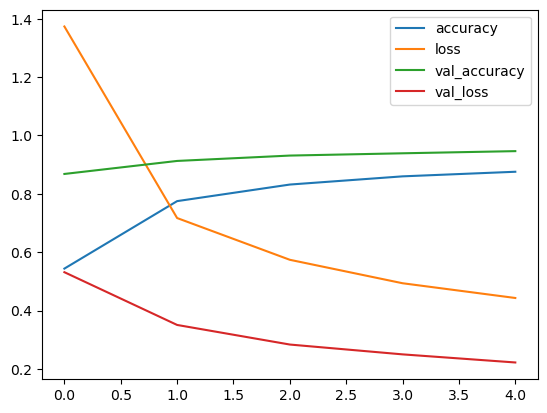

In [19]:
pd.DataFrame(history.history).plot()

<Axes: >

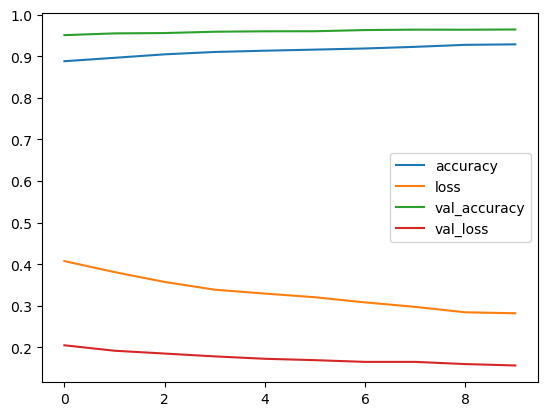

In [21]:
pd.DataFrame(history.history).plot()